In [7]:
## EACH DPS IS SAMPLED 10 TIMES FOR A GIVEN FLOW RATE. SO FAR THERE ARE 3 FLOW RATES, .5, 1, & 1.5 L/S. WE SUBTRACT THE AMBIENT PRESSURE READINGS
## TO SHOW MEASURED INCREASE FROM BASELINE. 


path = "/Users/gavin/Projects/Ventilator Flow Monitor/Data/Long Tube Data.txt"


In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["savefig.facecolor"] = "w"

In [3]:
flowDict = {}
with open(path,'r') as f:
    reader = csv.reader(f)
    for row in reader:
        #print(np.array(row,dtype=float))
        if len(row) < 5 and len(row) >0:
            if float(row[0]) not in flowDict.keys():
                flowDict[float(row[0])] = [] 
            curr = float(row[0])
        if len(row) > 1:
            flowDict[curr].append(np.array(row[1:],dtype=float))

            

for key in flowDict:
    flowDict[key] = np.array(flowDict[key])
    flowDict[key] = np.delete(flowDict[key],1,axis=1)
print(flowDict[.5].shape)

(10, 8)


0.2742009374999999


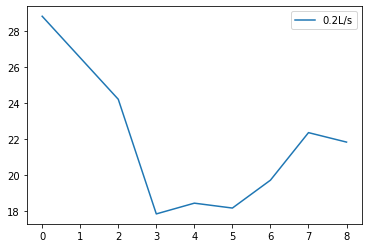

0.5484018749999998


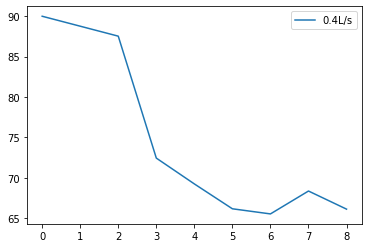

0.8226028124999999


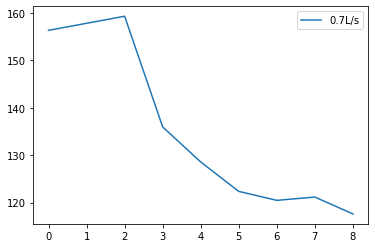

1.0968037499999996


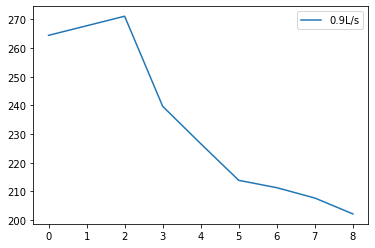

1.6452056249999998


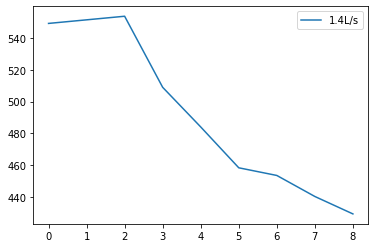

In [4]:
x = np.array([0,2,3,4,5,6,7,8])
y1 = np.mean(100*np.array(flowDict[1.5]),axis = 0)
y2 = np.mean(100*np.array(flowDict[1.]),axis=0)
y3 = np.mean(100*np.array(flowDict[.5]),axis=0)
y4 = np.mean(100*np.array(flowDict[2.0]),axis = 0)
y5 = np.mean(100*np.array(flowDict[3.0]),axis = 0)
tare = np.mean(100*np.array(flowDict[0]),axis = 0)

se1 = np.std(100*np.array(flowDict[1.5]),axis = 0)
se2 = np.std(100*np.array(flowDict[1.]),axis=0)
se3 = np.std(100*np.array(flowDict[.5]),axis=0)
se4 = np.std(100*np.array(flowDict[2.0]),axis = 0)
se5 = np.std(100*np.array(flowDict[3.0]),axis = 0)

#print(tare.shape)
#plt.figure(figsize = (20,20))
for key in flowDict:
    if key == 0:
        continue
    #plt.errorbar(x,np.mean(100*np.array(flowDict[key]),axis = 0) - tare, yerr = np.std(100*np.array(flowDict[key]),axis = 0), fmt = 'o', label = str(key*.47) + 'L/s')
    plt.plot(x,np.mean(100*np.array(flowDict[key]),axis = 0) - tare,label = str(key*.47)[:3] + 'L/s')
    Q = key * .47 * .001
    D = .0064
    A = .01*.005
    V = Q/A
    L = .4064
    lam = .0015
    density = 1.225
    expected = lam*(L/D)*(density/2)*(Q/A)
    print(expected)
    plt.legend()
    plt.show()
#plt.legend()
plt.show()




# DATA IS VERY CONSISTENT. NO INFO GAINED BY PLOTTING ALL POINTS AS OPPOSED TO AVERAGING OVER THE SAMPLES

# for y in np.array(flowDict[1.5]):
#     plt.scatter(x,y-tare)


# plt.scatter(x,1000*np.array(flowDict[1.5][0])-tare)
# plt.scatter(x,1000*np.array(flowDict[1.5][1])-tare)
# plt.scatter(x,1000*np.array(flowDict[1.5][2])-tare)
# plt.scatter(x,1000*np.array(flowDict[1.5][3])-tare)

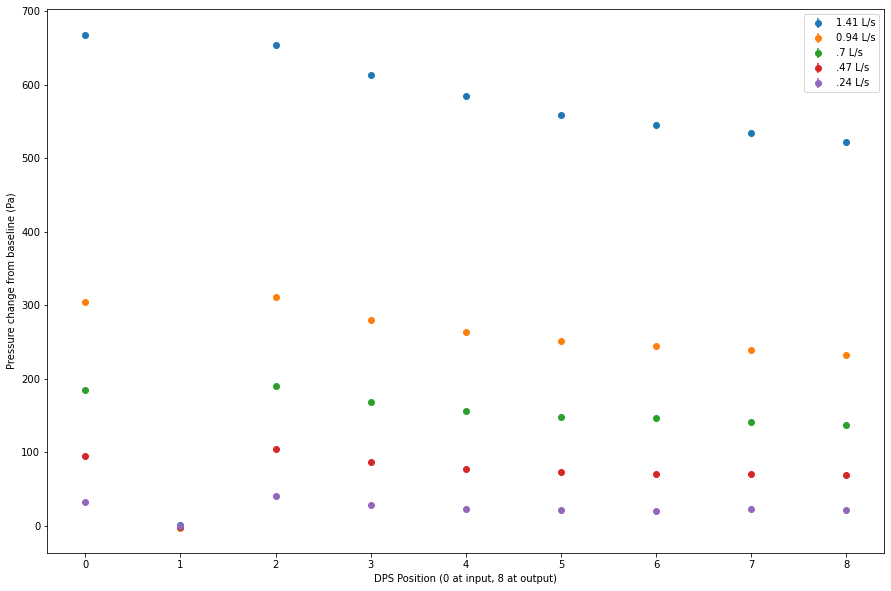

In [70]:
#ax3.errorbar(x, y, yerr=standardDeviations, xerr = horizontalStandardDeviations, fmt="o")
plt.figure(figsize=(15,10))
plt.errorbar(x,y5-tare,yerr = se1,fmt='o',label = '1.41 L/s')
plt.errorbar(x,y4-tare,yerr = se1,fmt='o',label = '0.94 L/s')
plt.errorbar(x,y1-tare,yerr = se1,fmt='o',label = '.7 L/s')
plt.errorbar(x,y2-tare,yerr = se2,fmt='o',label = '.47 L/s')
plt.errorbar(x,y3-tare,yerr = se3,fmt='o',label = '.24 L/s')
plt.xlabel('DPS Position (0 at input, 8 at output)')
plt.ylabel('Pressure change from baseline (Pa)')
plt.legend()
plt.savefig('Long Tube Plot 3',dpi = 300)
plt.show()

In [63]:
print(y2-tare)

[89.996945 -1.881085 87.532355 72.441115 69.24439  66.166065 65.53193
 68.364565 66.12334 ]


In [62]:
print(y2[0]-y2[-1])

38.77993000000424


In [64]:
print(y1[0]-y1[-1])

53.626709999967716


In [65]:
print(y2-tare)

[89.996945 -1.881085 87.532355 72.441115 69.24439  66.166065 65.53193
 68.364565 66.12334 ]
